# import and create dataframe

In [28]:
import pandas as pd
fish = pd.read_csv('ac_fish.csv')
insects = pd.read_csv('ac_insects.csv')

In [29]:
# the months and times active columns are confusing and can be displayed in a more efficient way.
fish_months = fish.iloc[:,8:20]

# clean month/times data

In [30]:
# rename the columns
fish_months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July','Aug','Sep','Oct','Nov','Dec']




In [31]:
active_months = []
for i in range(len(fish_months)):
# iterate through the amount of rows in the fish_months dataframe
    months = list(fish_months.columns[(fish_months.notna()).iloc[i]])
    # return the column labels according to the condition that the values are not null, 
    # iterate through each row iloc[i]
    active_months.append(months)

fishy_months = pd.DataFrame(active_months)
fishy_months.fillna(value=pd.np.nan, inplace=True)
fishy_months.columns = ['0','1','2','3','4','5','6','7','8','9','10','11']

In [32]:
first_month = fishy_months.iloc[:,0]
date_range = pd.DataFrame(first_month)

In [33]:
all_last_months = []
for i in range(len(fishy_months)):
    index = int(pd.Series(fishy_months.iloc[i,:]).last_valid_index())
    last_month = fishy_months.iloc[i, index]
    all_last_months.append(last_month)


In [34]:
date_range['last'] = all_last_months


In [35]:
times = fish_months.fillna(method='bfill', axis=1).iloc[:, 0]
date_range['time'] = times

In [36]:
date_range.columns = ['first','last','time']

# count fish occurrence by date range

In [37]:
#date_range.groupby(['first','last']).size().reset_index(name='count')

In [38]:
fish = fish[['Name', 'Sell', 'Where/How', 'Total Catches to Unlock', 'Spawn Rates']]


In [39]:
fish = pd.merge(fish, date_range, left_index=True,right_index=True)

In [40]:
import plotly.express as px
fig = px.histogram(fish, x="Sell", nbins=50)
#fig.show()

In [41]:
no_months = list(fish_months.apply(lambda x: x.count(), axis=1))
fish['months_active'] = no_months

In [42]:
import plotly.express as px
fig = px.scatter(fish, x="Sell", y="months_active")
fig.show()

In [43]:
pd.set_option('display.max_rows', None)
fish['time']

# 4 am to 9 pm is 12 hours
# 9 pm to 4 am is 7 hours
# 9 am to 4 pm is 7 hours
# 9 AM – 4 PM; 9 PM – 4 AM is 14 hours


fouram_ninepm = '4 AM – 9 PM'
fourpm_nineam = '4 PM –\xa09 AM'
ninepm_fouram = '9 PM – 4 AM'
nineam_fourpm = '9 AM –\xa04 PM'
ninefourninefour = '9 AM – 4 PM; 9 PM – 4 AM'
allday = 'All day'




total_hours = []

for i in fish['time']:
    if i == '4 AM – 9 PM':
        total_hours.append(12)
    elif i == '9 PM – 4 AM' or i == '9 PM –\xa04 AM':
        total_hours.append(7)
    elif i == '4 PM –\xa09 AM':
        total_hours.append(17)
    elif i == '9 AM –\xa04 PM':
        total_hours.append(7)
    elif i == '9 AM –\xa04 PM; 9 PM – 4 AM':
        total_hours.append(14)
    elif i == 'All day':
        total_hours.append(24)
    else:
        total_hours.append('?')
fish['total_hours'] = total_hours       

In [44]:
location = {'Where/How':{'Sea':1, 'Sea (rainy days)': 1, 'Pier':1, 'River':0, 'River (clifftop)': 0, 'Pond':0, 'River (mouth)':0, }}
fish.replace(location, inplace=True)





In [18]:
46/80

# 57.5% of all fish are caught in the ocean.

0.575

In [45]:
import plotly.express as px
fig = px.scatter(fish, x="Sell", y="Where/How")
fig.show()

In [46]:
price = fish['Sell']

In [57]:
import numpy as np
price = np.array(fish['Sell']).reshape(-1,1)
location = np.array(fish['Where/How']).reshape(-1,1)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(price, location)
# Store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# Create the line
lin_income = (interc + price * coef)

In [76]:
location = location.astype(int)
a = fish['Where/How'].astype(int)
location_a = []
for i in a:
    location_a.append(i)

In [82]:
location = np.array(location_a)
location

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

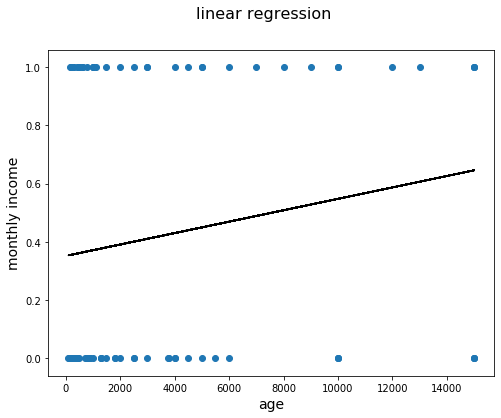

In [60]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(price, location)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(price, lin_income, c='black')
plt.show()

In [83]:
# Instantiate a Logistic regression model
# Solver must be specified to avoid warning, see documentation for more information
# liblinear is recommended for small datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
regr = LogisticRegression(C=1e5, solver='liblinear')

# Fit the model to the training set
regr.fit(price, location)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Store the coefficients
coef = regr.coef_
interc = regr.intercept_

# Create the linear predictor
lin_pred = (price * coef + interc)

# Perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

# Sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(price, mod_income.ravel()),key=lambda x: x[0]))

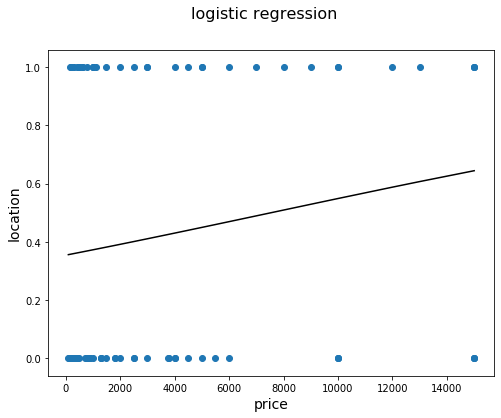

In [89]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(price, location)
plt.xlabel('price', fontsize=14)
plt.ylabel('location', fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c='black')
plt.show()

In [90]:
y = fish['Where/How']
y.shape

(80,)

In [91]:
X = pd.DataFrame(np.zeros(80))
fish['Where/How'].value_counts()


0    46
1    34
Name: Where/How, dtype: int64

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression().fit(X,y)

In [95]:
logreg.predict(X_test.iloc[1:2,:])
print(logreg.coef_)
print(logreg.intercept_)

[[0.]]
[-0.30228086]


In [96]:
odds = np.exp(logreg.intercept_[0])
probability = (odds / (1+ odds))
probability

0.4250000019587727

In [99]:
X = price
y = fish['Where/How']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.5625

In [100]:
logreg.coef_

array([[0.00010705]])

In [101]:
logreg.intercept_

array([-0.70294362])

In [114]:
x = 20000
y = (.00010705*x) - .70294362
odds = (np.exp(y))/(1+np.exp(y))
odds

0.8081534902915545